In [ ]:
##############################################################################################

# HARD SVM learning ON IRIS DATA

IMPORT LIBRARIES

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [ ]:

sns.set()

from sklearn.svm import SVC
from cvxopt import matrix as cvxopt_matrix
from cvxopt import solvers as cvxopt_solvers

CONSIDER A DATA WHICH IS LINEARLY SEPARABLE

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()


In [ ]:
X = iris['data'][:,(2,3)]

scaler = StandardScaler()
Xstan = scaler.fit_transform(X)

data = pd.DataFrame(data=Xstan, columns=['petal length','petal width'])
data['target'] = iris['target']
data = data[data['target']!=2] 
data.head()

,petal length,petal width,target
0,-1.340227,-1.315444,0
1,-1.340227,-1.315444,0
2,-1.397064,-1.315444,0
3,-1.283389,-1.315444,0
4,-1.340227,-1.315444,0


HERE WE CAN OBSERVE THAT BY CONSIDERING PETAL LENGTH AND PETAL WIDTH FEATURES WE CAN DISTINGUISH IRIS-SETOSA AND IRIS-VERSICOLOR.  SO THE DATASET WILL BE LINEARLY SEPARABLE.

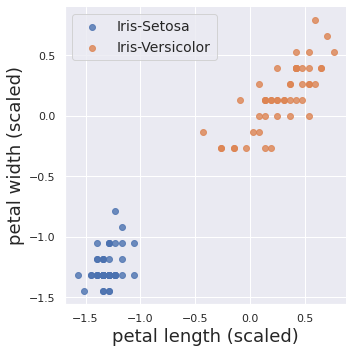

In [ ]:
sns.lmplot(x='petal length',y='petal width',hue='target',data=data, fit_reg=False, legend=False)
plt.legend(['Iris-Setosa','Iris-Versicolor'], fontsize = 14)
plt.xlabel('petal length (scaled)', fontsize = 18)
plt.ylabel('petal width (scaled)', fontsize = 18)
plt.show()

In [ ]:
X=data.loc[:, ["petal length", "petal width"]]

In [ ]:
X=X.values

In [ ]:
X.shape

(100, 2)

In [ ]:
y=data['target']

In [ ]:
y=list(y)

print(y)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
z=[]
for i in y:
  if i==0:
    z.append(-1)
  else:
    z.append(1)

In [ ]:
y=np.array(z).reshape(-1,1)

In [ ]:
y

array([[-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],

In [ ]:
from cvxopt import matrix as cvxopt_matrix
from cvxopt import solvers as cvxopt_solvers

#Initializing values and computing H. Note the 1. to force to float type
m,n = X.shape
y = y.reshape(-1,1) * 1.
X_dash = y * X
H = np.dot(X_dash , X_dash.T) * 1.



In [ ]:
m

100

In [ ]:
n

2

In [ ]:
H

array([[ 3.52660084,  3.52660084,  3.60277586, ...,  0.58717782,
        -0.74940715,  0.43482776],
       [ 3.52660084,  3.52660084,  3.60277586, ...,  0.58717782,
        -0.74940715,  0.43482776],
       [ 3.60277586,  3.60277586,  3.68218138, ...,  0.60468709,
        -0.77389428,  0.44587605],
       ...,
       [ 0.58717782,  0.58717782,  0.60468709, ...,  0.11245909,
        -0.15004655,  0.07744054],
       [-0.74940715, -0.74940715, -0.77389428, ..., -0.15004655,
         0.20270928, -0.10107227],
       [ 0.43482776,  0.43482776,  0.44587605, ...,  0.07744054,
        -0.10107227,  0.05534397]])

In [ ]:
#Converting into cvxopt format
P = cvxopt_matrix(H)
q = cvxopt_matrix(-np.ones((m, 1)))
G = cvxopt_matrix(-np.eye(m))
h = cvxopt_matrix(np.zeros(m))
A = cvxopt_matrix(y.reshape(1, -1))
b = cvxopt_matrix(np.zeros(1))

#Setting solver parameters (change default to decrease tolerance) 
cvxopt_solvers.options['show_progress'] = False
cvxopt_solvers.options['abstol'] = 1e-10
cvxopt_solvers.options['reltol'] = 1e-10
cvxopt_solvers.options['feastol'] = 1e-10

#Run solver
sol = cvxopt_solvers.qp(P, q, G, h, A, b)
alphas = np.array(sol['x'])

In [ ]:
w = ((y * alphas).T @ X).reshape(-1,1)

#Selecting the set of indices S corresponding to non zero parameters
S = (alphas > 1e-4).flatten()

#Computing b
b = y[S] - np.dot(X[S], w)

#Display results
print('Alphas = ',alphas[alphas > 1e-4])
print('w = ', w.flatten())
print('b = ', b[0])

Alphas =  [1.8755525 1.8755525]
w =  [1.4924221  1.23441536]
b =  [1.80438231]


VERIFYING RESULTS WITH SK-LEARN

In [ ]:
clf = SVC(C = 10, kernel = 'linear')
clf.fit(X, y.ravel()) 

print('w = ',clf.coef_)
print('b = ',clf.intercept_)
print('Indices of support vectors = ', clf.support_)
print('Support vectors = ', clf.support_vectors_)
print('Number of support vectors for each class = ', clf.n_support_)
print('Coefficients of the support vector in the decision function = ', np.abs(clf.dual_coef_))

w =  [[1.49242209 1.23441536]]
b =  [1.80438229]
Indices of support vectors =  [43 98]
Support vectors =  [[-1.22655167 -0.78891556]
 [-0.4308277  -0.13075464]]
Number of support vectors for each class =  [1 1]
Coefficients of the support vector in the decision function =  [[1.87555249 1.87555249]]


In [ ]:
X.shape

(100, 2)

In [ ]:
w.shape

(2, 1)

In [ ]:
y_=np.sign(np.dot(X,w))

In [ ]:
from sklearn import metrics

metrics.accuracy_score(y,y_)

0.9

### SOFT SVM learning ON IRIS DATA

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

HERE WE CAN OBSERVE THAT BY CONSIDERING SEPAL LENGTH AND SEPAL WIDTH FEATURES WE CAN CAN'T DISTINGUISH IRIS-VIRGINICA AND IRIS-VERSICOLOR.  SO THE DATASET WILL BE NOT-LINEARLY SEPARABLE.

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()


In [ ]:
X = iris['data'][:,1:3]

scaler = StandardScaler()
Xstan = scaler.fit_transform(X)





data = pd.DataFrame(data=Xstan, columns=['sepal length','sepal width'])
data['target'] = iris['target']
data = data[data['target']!=0] 
data.head()

,sepal length,sepal width,target
50,0.328414,0.535409,1
51,0.328414,0.421734,1
52,0.098217,0.649083,1
53,-1.743357,0.137547,1
54,-0.592373,0.478571,1


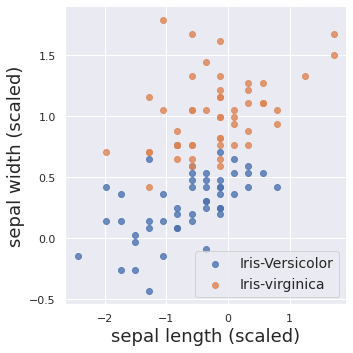

In [ ]:
sns.lmplot(x='sepal length',y='sepal width',hue='target',data=data, fit_reg=False, legend=False)
plt.legend(['Iris-Versicolor','Iris-virginica'], fontsize = 14)
plt.xlabel('sepal length (scaled)', fontsize = 18)
plt.ylabel('sepal width (scaled)', fontsize = 18)
plt.show()

In [ ]:
X=data.loc[:, ["sepal length", "sepal width"]]

In [ ]:
X=X.values

In [ ]:
X.shape

(100, 2)

In [ ]:
y=data['target']

In [ ]:
y=list(y)

In [ ]:
z=[]
for i in y:
  if i==1:
    z.append(-1)
  else:
    z.append(1)

In [ ]:
y=np.array(z).reshape(-1,1)

In [ ]:
C = 10
m,n = X.shape
y = y.reshape(-1,1) * 1.
X_dash = y * X
H = np.dot(X_dash , X_dash.T) * 1.

#Converting into cvxopt format - as previously
P = cvxopt_matrix(H)
q = cvxopt_matrix(-np.ones((m, 1)))
G = cvxopt_matrix(np.vstack((np.eye(m)*-1,np.eye(m))))
h = cvxopt_matrix(np.hstack((np.zeros(m), np.ones(m) * C)))
A = cvxopt_matrix(y.reshape(1, -1))
b = cvxopt_matrix(np.zeros(1))

#Run solver
sol = cvxopt_solvers.qp(P, q, G, h, A, b)
alphas = np.array(sol['x'])

#==================Computing and printing parameters===============================#
w = ((y * alphas).T @ X).reshape(-1,1)
S = (alphas > 1e-4).flatten()
b = y[S] - np.dot(X[S], w)

#Display results
print('Alphas = ',alphas[alphas > 1e-4])
print('w = ', w.flatten())
print('b = ', b[0])

Alphas =  [ 1.94394435 10.          6.12628033 10.         10.         10.
 10.         10.         10.         10.         10.         10.
 10.         10.          9.03508651 10.         10.         10.
 10.         10.         10.          9.03513818 10.        ]
w =  [-0.4572747   7.40801712]
b =  [-4.81614035]


VERIFYING RESULTS WITH SK-LEARN

In [ ]:
clf = SVC(C = 10, kernel = 'linear')
clf.fit(X, y.ravel()) 

print('w = ',clf.coef_)
print('b = ',clf.intercept_)
print('Indices of support vectors = ', clf.support_)
print('Support vectors = ', clf.support_vectors_)
print('Number of support vectors for each class = ', clf.n_support_)
print('Coefficients of the support vector in the decision function = ', np.abs(clf.dual_coef_))

w =  [[-0.45706082  7.40454403]]
b =  [-4.81403861]
Indices of support vectors =  [ 0  2  4 13 18 20 22 23 26 27 33 36 56 60 63 71 73 76 77 88 91 96 99]
Support vectors =  [[ 0.32841405  0.53540856]
 [ 0.09821729  0.64908342]
 [-0.59237301  0.47857113]
 [-0.36217625  0.53540856]
 [-1.97355361  0.42173371]
 [ 0.32841405  0.59224599]
 [-1.28296331  0.64908342]
 [-0.59237301  0.53540856]
 [-0.59237301  0.59224599]
 [-0.13197948  0.70592084]
 [-0.82256978  0.76275827]
 [ 0.09821729  0.53540856]
 [-1.28296331  0.42173371]
 [ 0.32841405  0.76275827]
 [-1.28296331  0.70592084]
 [-0.59237301  0.64908342]
 [-0.82256978  0.64908342]
 [-0.59237301  0.59224599]
 [-0.13197948  0.64908342]
 [-0.13197948  0.59224599]
 [ 0.09821729  0.76275827]
 [-1.28296331  0.70592084]
 [-0.13197948  0.76275827]]
Number of support vectors for each class =  [12 11]
Coefficients of the support vector in the decision function =  [[ 1.95339701 10.          6.10391442 10.         10.         10.
  10.         10.        

In [ ]:
y_=np.sign(np.dot(X,w))
from sklearn import metrics

metrics.accuracy_score(y,y_)

0.55